In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Soebel Operator for Edge Detection

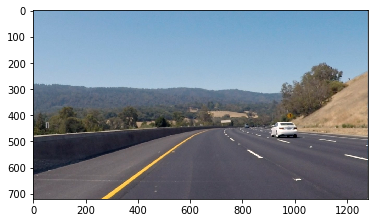

In [2]:
img = mpimg.imread("curved-lane.jpg")
plt.imshow(img)

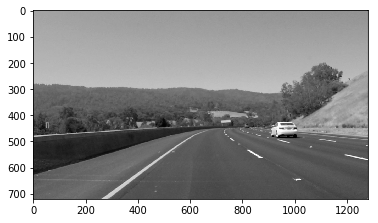

In [10]:
# convert the image to gray because cv2.Sobel takes a gray image!
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

Text(0.5,1,'sybinary to get horizontal lines')

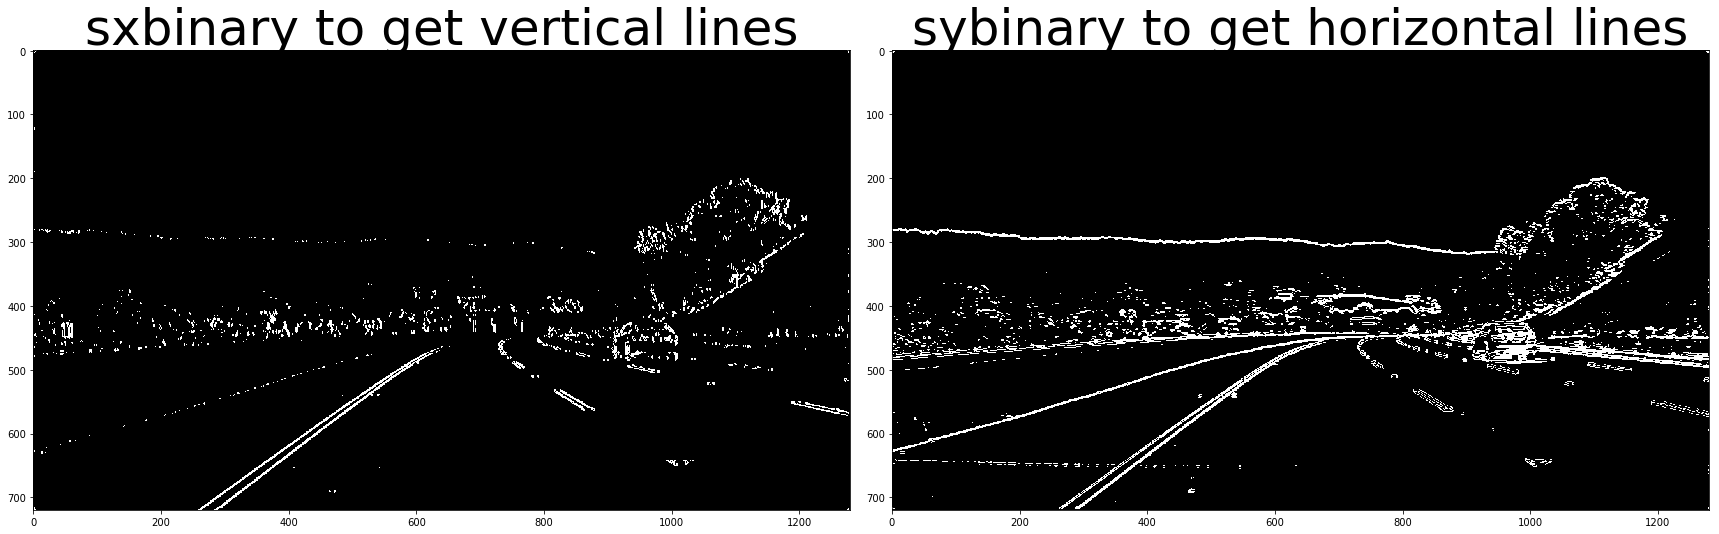

In [9]:
thresh_min = 20
thresh_max = 100

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.absolute(sobelx)
scaled_x_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
sxbinary = np.zeros_like(scaled_x_sobel)
sxbinary[(scaled_x_sobel >= thresh_min) & (scaled_x_sobel <= thresh_max)] = 1

sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobely = np.absolute(sobely)
scaled_y_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
sybinary = np.zeros_like(scaled_y_sobel)
sybinary[(scaled_y_sobel >= thresh_min) & (scaled_y_sobel <= thresh_max)] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(sxbinary, cmap='gray')
ax1.set_title('sxbinary to get vertical lines', fontsize=50)
ax2.imshow(sybinary, cmap='gray')
ax2.set_title('sybinary to get horizontal lines', fontsize=50)

## Let's define a function to perform abs Sobel

In [26]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        dir_1 = 1
        dir_2 = 0
    elif orient == 'y':
        dir_1 = 0
        dir_2 = 1
    else:
        print("error: undefined orient!")
        return img
    sobel_orient = cv2.Sobel(gray, cv2.CV_64F, dir_1, dir_2)
    print("sobel_orient", sobel_orient)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel_orient = np.absolute(sobel_orient)
    print("abs_sobel_orient", abs_sobel_orient)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel_orient/np.max(abs_sobel_orient))
    print("scaled_sobel", scaled_sobel)
    # 5) Create a mask of 1's where the scaled gradient magnitude is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel) # prepare the output and fill with zeros
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    print("binary_output", binary_output)
    return binary_output

In [27]:
# Now let's use the defined function abs_sobel_thresh()

sobel_orient [[ 0.         -0.93525493 -0.36786664 ...  0.80677652  0.92356077
   0.        ]
 [ 0.         -0.79961962 -0.28826267 ...  0.88358834  1.20546664
   0.        ]
 [ 0.         -0.51289803 -0.13071752 ...  0.66555697  1.5195961
   0.        ]
 ...
 [ 0.         -0.36862743  0.08235291 ...  0.42352939  1.79607856
   0.        ]
 [ 0.         -0.7254903  -0.08235294 ...  1.08235288  1.98823535
   0.        ]
 [ 0.         -0.91764724 -0.20392156 ...  1.39607835  2.07843137
   0.        ]]
abs_sobel_orient [[0.         0.93525493 0.36786664 ... 0.80677652 0.92356077 0.        ]
 [0.         0.79961962 0.28826267 ... 0.88358834 1.20546664 0.        ]
 [0.         0.51289803 0.13071752 ... 0.66555697 1.5195961  0.        ]
 ...
 [0.         0.36862743 0.08235291 ... 0.42352939 1.79607856 0.        ]
 [0.         0.7254903  0.08235294 ... 1.08235288 1.98823535 0.        ]
 [0.         0.91764724 0.20392156 ... 1.39607835 2.07843137 0.        ]]
scaled_sobel [[  0  74  29 ...  64 

Text(0.5,1,'Thresholded Gradient')

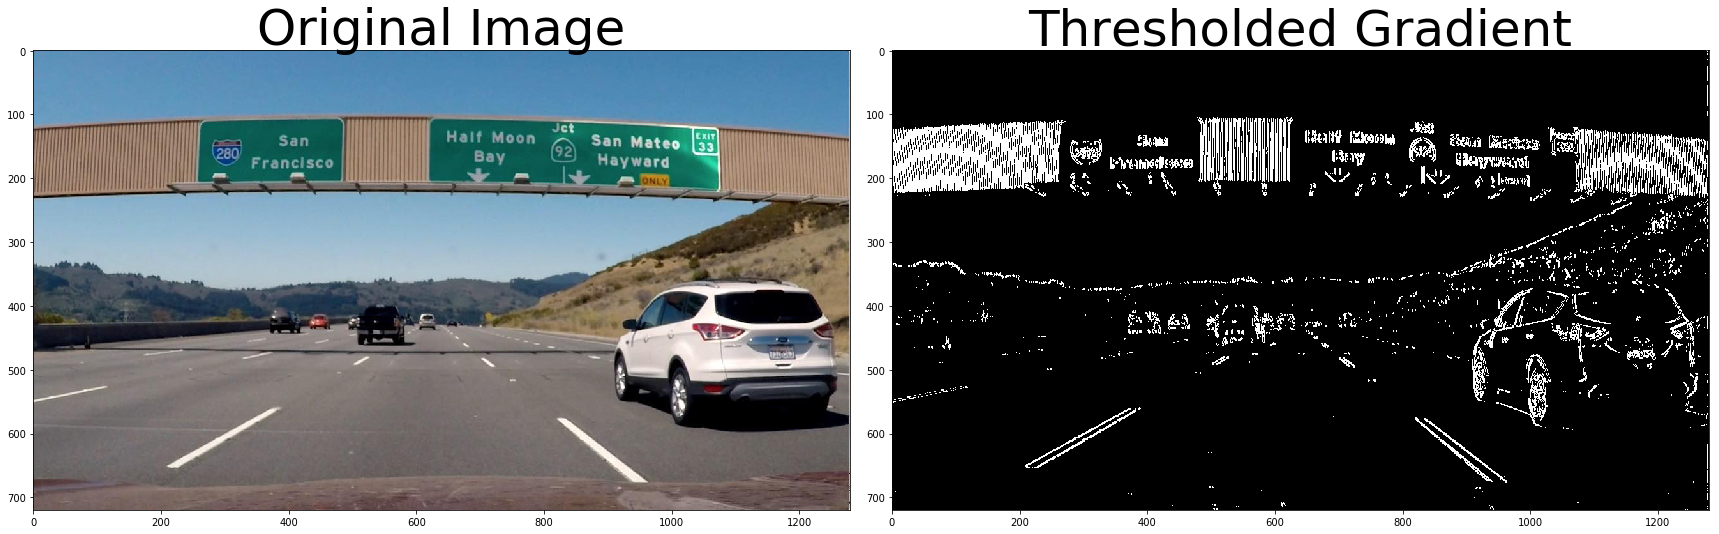

In [32]:
# Read in an image a new image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Note: calling your function with orient='x', thresh_min=50, thresh_max=100
# increasing the thresh_min will eliminate the edges with less gradient

# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)